In [3]:
import pandas as pd
import numpy as np

In [4]:
raw_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")

In [5]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
raw_data.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [8]:
raw_data.MSSubClass.value_counts().sort_index()

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

In [9]:
list(set(raw_data.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [10]:
df_num = raw_data.select_dtypes(include = ['float64', 'int64'])

In [11]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
print(len(sorted(df_num.YrSold.unique())))

5


In [35]:
df_num.groupby('YrSold').size()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
dtype: int64

<AxesSubplot: >

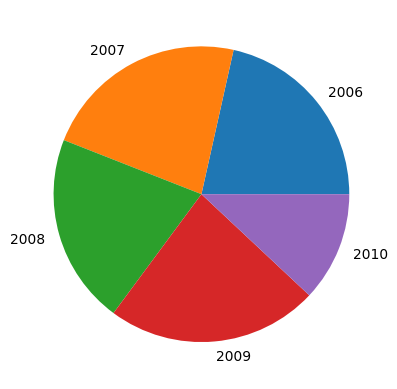

In [26]:
df_num.groupby('YrSold').size().plot.pie()

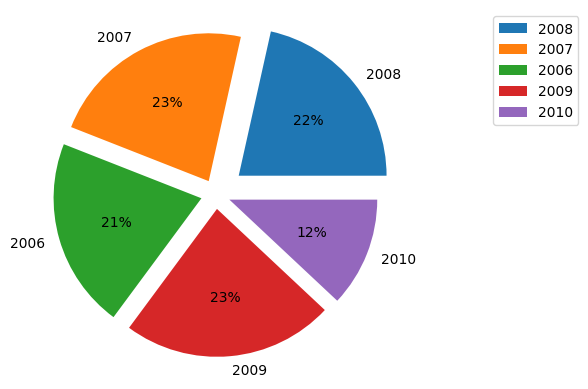

In [69]:
explode = [0.2, 0.1, 0.1, 0.1,0.1]
plt.pie(df_num.groupby('YrSold').size(), labels = df_num.YrSold.unique(),autopct='%1.00f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')
plt.show() 

In [62]:
import plotly.express as px
fig = px.pie(df_num, values=df_num.groupby('YrSold').size(), names=df_num.YrSold.unique(), title='Year sold', )
fig.show()

<AxesSubplot: ylabel='YrSold'>

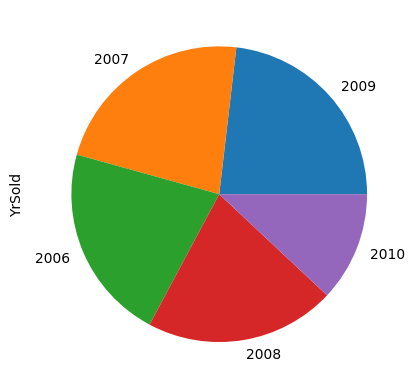

In [33]:
df_num.YrSold.value_counts().plot.pie()

In [73]:
bins = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
df_num['year_bin'] = pd.cut(df_num['YearBuilt'], bins, ordered=True)
print (df_num.year_bin.value_counts())

(2000, 2010]    364
(1960, 1970]    182
(1990, 2000]    175
(1970, 1980]    174
(1950, 1960]    164
(1940, 1950]     81
(1920, 1930]     76
(1910, 1920]     71
(1930, 1940]     63
(1980, 1990]     63
(1900, 1910]     22
(1890, 1900]     14
(1870, 1880]      6
(1880, 1890]      5
Name: year_bin, dtype: int64


<AxesSubplot: title={'center': 'Build years count'}>

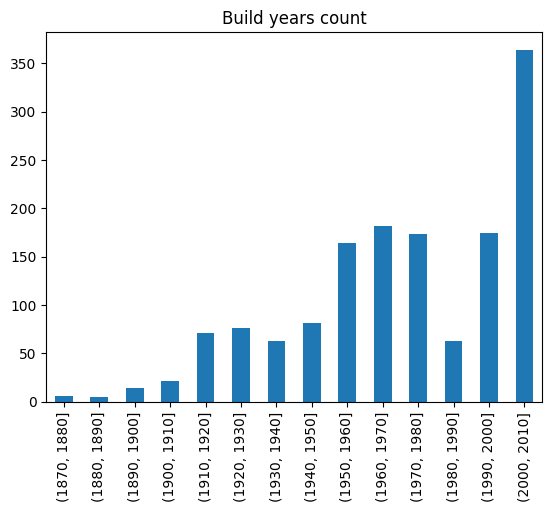

In [74]:
df_num.year_bin.value_counts(sort=False).plot(kind="bar", title= "Build years count")

In [75]:
import matplotlib.pyplot as plt

In [76]:
df_num.year_bin.value_counts(sort=False)

(1870, 1880]      6
(1880, 1890]      5
(1890, 1900]     14
(1900, 1910]     22
(1910, 1920]     71
(1920, 1930]     76
(1930, 1940]     63
(1940, 1950]     81
(1950, 1960]    164
(1960, 1970]    182
(1970, 1980]    174
(1980, 1990]     63
(1990, 2000]    175
(2000, 2010]    364
Name: year_bin, dtype: int64

In [77]:
df_num.year_bin

0       (2000, 2010]
1       (1970, 1980]
2       (2000, 2010]
3       (1910, 1920]
4       (1990, 2000]
            ...     
1455    (1990, 2000]
1456    (1970, 1980]
1457    (1940, 1950]
1458    (1940, 1950]
1459    (1960, 1970]
Name: year_bin, Length: 1460, dtype: category
Categories (14, interval[int64, right]): [(1870, 1880] < (1880, 1890] < (1890, 1900] < (1900, 1910] ... (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010]]

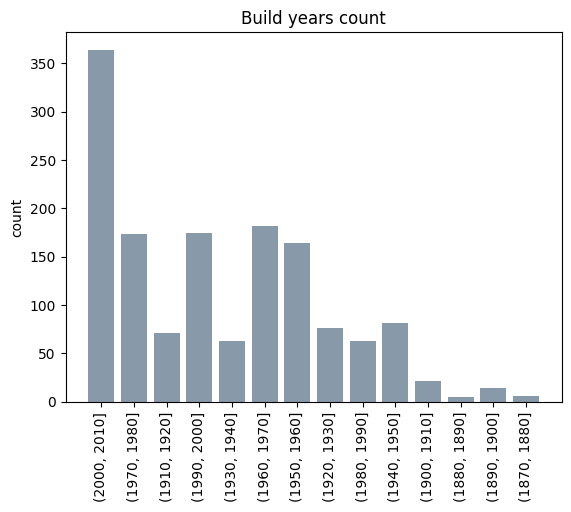

In [78]:
data = df_num.year_bin.astype(str).value_counts(sort=False)
plt.bar(data.index, data.values, align='center', alpha=0.5, color='#123456')
plt.xticks(data.index, rotation='vertical')
plt.ylabel('count')
plt.title('Build years count')

plt.show()

In [ ]:
import seaborn as sns
datas = df_num.year_bin.astype(str).value_counts(sort=False)
print(datas.values)
print(datas.index)

In [ ]:
sns.barplot(x = datas.index, y=datas.values, data=datas)

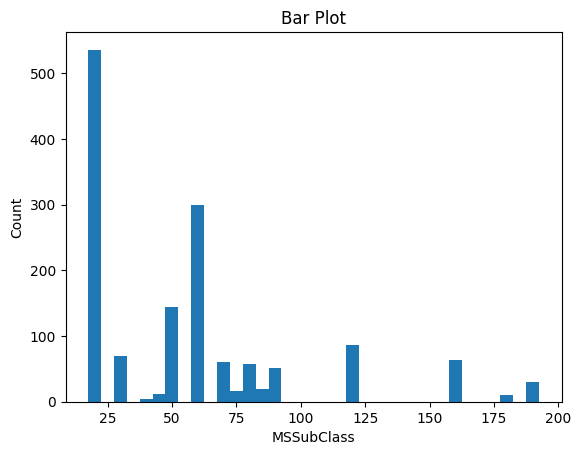

In [1]:
# using pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pyspark
sc = pyspark.SparkConf()
print(sc)

# # Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

raw_saprk_df = spark.read.csv("../data/house-prices-advanced-regression-techniques/train.csv",header=True)

raw_saprk_df = raw_saprk_df.withColumn('MSSubClass', raw_saprk_df['MSSubClass'].cast('int'))

one_way_data = raw_saprk_df.groupBy("MSSubClass").count().orderBy("MSSubClass")

one_way_data2 = raw_saprk_df.groupBy("MSSubClass").count().toPandas()

plt.bar(one_way_data2["MSSubClass"], one_way_data2["count"], width=5)

# Add labels and title
plt.xlabel('MSSubClass')
plt.ylabel('Count')
plt.title('Bar Plot')

# Show the plot
plt.show()


In [3]:
import os
print(os.environ.get("JAVA_HOME"))

C:\Program Files\Java\jdk-17


In [4]:
one_way_data2

,MSSubClass,count
0,85,20
1,190,30
2,20,536
3,40,4
4,120,87
5,50,144
6,45,12
7,80,58
8,160,63
9,70,60


In [5]:
one_way_data2

,MSSubClass,count
0,85,20
1,190,30
2,20,536
3,40,4
4,120,87
5,50,144
6,45,12
7,80,58
8,160,63
9,70,60


<AxesSubplot: xlabel='MSSubClass', ylabel='count'>

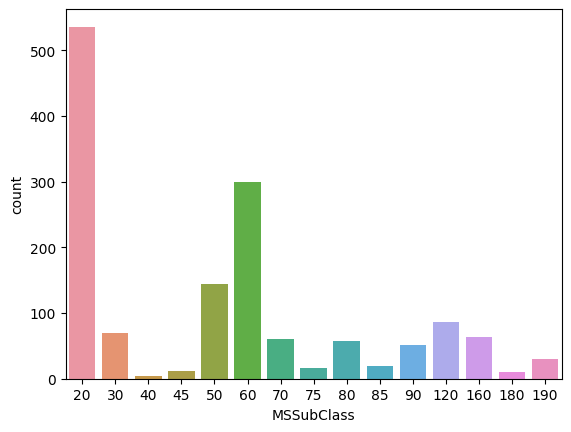

In [6]:
import seaborn as sns
sns.barplot(x="MSSubClass", y="count", data=one_way_data2)

In [72]:
import plotly.express as px
fig = px.bar(one_way_data2, x="MSSubClass", y="count", title='Value Counts of Categories')
fig.show()

In [2]:
one_way_data = raw_saprk_df.groupBy("MSSubClass").count().orderBy("MSSubClass")

print(one_way_data.select("MSSubClass").rdd.flatMap(lambda x: x).collect())
# Collect data to the driver
# MSSubClass = one_way_data.select("MSSubClass").rdd.flatMap(lambda x: x).collect()
# count_values = one_way_data.select("count").rdd.flatMap(lambda x: x).collect()

# # Plot the bar chart using Matplotlib
# plt.bar(MSSubClass, count_values)

# # Add labels and title
# plt.xlabel('Categories')
# plt.ylabel('Count')
# plt.title('Value Counts of Categories')

# # Show the plot
# plt.show()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 11.0 failed 1 times, most recent failure: Lost task 0.0 in stage 11.0 (TID 6) (host.docker.internal executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:713)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:757)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:675)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:641)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:617)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:574)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:532)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 17 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1046)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1045)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:842)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:713)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:757)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:675)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:641)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:617)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:574)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:532)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 17 more
